In [17]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import PolynomialFeatures

# 합치기 (Continued)

In [3]:
df1 = pd.read_csv("data/concat_1.csv")
df2 = pd.read_csv("data/concat_2.csv")
df3 = pd.read_csv("data/concat_3.csv")

In [4]:
data_dict = {"A": "n1", "B": "n2", "C": "n3", "D": "n4"}
df1.append(data_dict)

TypeError: Can only append a Series if ignore_index=True or if the Series has a name

In [6]:
rci = pd.concat([df1, df2, df3], ignore_index=True)
rci

,A,B,C,D
0,a0,b0,c0,d0
1,a1,b1,c1,d1
2,a2,b2,c2,d2
3,a3,b3,c3,d3
4,a4,b4,c4,d4
5,a5,b5,c5,d5
6,a6,b6,c6,d6
7,a7,b7,c7,d7
8,a8,b8,c8,d8
9,a9,b9,c9,d9


In [8]:
pd.concat([df1, df2, df3], axis=1, ignore_index=True)

,0,1,2,3,4,5,6,7,8,9,10,11
0,a0,b0,c0,d0,a4,b4,c4,d4,a8,b8,c8,d8
1,a1,b1,c1,d1,a5,b5,c5,d5,a9,b9,c9,d9
2,a2,b2,c2,d2,a6,b6,c6,d6,a10,b10,c10,d10
3,a3,b3,c3,d3,a7,b7,c7,d7,a11,b11,c11,d11


In [14]:
# df1, df2, df3에서 A열만 모아서 합치겠다
col_concat = pd.concat([df1, df2, df3], axis=1)
col_concat
col_concat["A"]

,A,A,A
0,a0,a4,a8
1,a1,a5,a9
2,a2,a6,a10
3,a3,a7,a11


# 데이터 재구조화 (Continued)

## Stack

In [15]:
mi = pd.MultiIndex.from_tuples([("c1", "2019"), ("c1", "2020"), ("c2", "2019"), ("c2", "2020")])
mi

MultiIndex(levels=[['c1', 'c2'], ['2019', '2020']],
           codes=[[0, 0, 1, 1], [0, 1, 0, 1]])

In [23]:
df = pd.DataFrame(np.arange(16).reshape(4,4), index=mi, columns=["p1", "p2","p3", "p4"])
df

p1  p2  p3  p4
c1 2019   0   1   2   3
   2020   4   5   6   7
c2 2019   8   9  10  11
   2020  12  13  14  15

In [25]:
ds = df.stack()
ds

c1  2019  p1     0
          p2     1
          p3     2
          p4     3
    2020  p1     4
          p2     5
          p3     6
          p4     7
c2  2019  p1     8
          p2     9
          p3    10
          p4    11
    2020  p1    12
          p2    13
          p3    14
          p4    15
dtype: int32

In [26]:
type(ds)    # 시리즈이다

pandas.core.series.Series

In [28]:
ds.index

MultiIndex(levels=[['c1', 'c2'], ['2019', '2020'], ['p1', 'p2', 'p3', 'p4']],
           codes=[[0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1], [0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1], [0, 1, 2, 3, 0, 1, 2, 3, 0, 1, 2, 3, 0, 1, 2, 3]])

In [30]:
ds["c1"]

2019  p1    0
      p2    1
      p3    2
      p4    3
2020  p1    4
      p2    5
      p3    6
      p4    7
dtype: int32

In [31]:
ds["c1"]["2020"]

p1    4
p2    5
p3    6
p4    7
dtype: int32

In [33]:
ds["c1"]["2020"][["p2", "p3"]]    # 두개 이상일 때는 대괄호로 한번 더 묶어준다

p2    5
p3    6
dtype: int32

In [35]:
df.ix["c2", "p4"]

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


2019    11
2020    15
Name: p4, dtype: int32

In [36]:
df.ix["c2", "p4"] = np.nan
df

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


p1  p2  p3   p4
c1 2019   0   1   2  3.0
   2020   4   5   6  7.0
c2 2019   8   9  10  NaN
   2020  12  13  14  NaN

In [38]:
df.stack()    # NaN이 출력 안됨 (dropna=True가 default이기 때문에)

c1  2019  p1     0.0
          p2     1.0
          p3     2.0
          p4     3.0
    2020  p1     4.0
          p2     5.0
          p3     6.0
          p4     7.0
c2  2019  p1     8.0
          p2     9.0
          p3    10.0
    2020  p1    12.0
          p2    13.0
          p3    14.0
dtype: float64

In [40]:
df.stack(dropna=False)

c1  2019  p1     0.0
          p2     1.0
          p3     2.0
          p4     3.0
    2020  p1     4.0
          p2     5.0
          p3     6.0
          p4     7.0
c2  2019  p1     8.0
          p2     9.0
          p3    10.0
          p4     NaN
    2020  p1    12.0
          p2    13.0
          p3    14.0
          p4     NaN
dtype: float64

## Unstack

In [41]:
ds.unstack()

p1  p2  p3  p4
c1 2019   0   1   2   3
   2020   4   5   6   7
c2 2019   8   9  10  11
   2020  12  13  14  15

In [43]:
ds.unstack(level=-1)    # default

p1  p2  p3  p4
c1 2019   0   1   2   3
   2020   4   5   6   7
c2 2019   8   9  10  11
   2020  12  13  14  15

In [44]:
ds.unstack(level=0)

c1  c2
2019 p1   0   8
     p2   1   9
     p3   2  10
     p4   3  11
2020 p1   4  12
     p2   5  13
     p3   6  14
     p4   7  15

In [45]:
ds.unstack(level=1)

2019  2020
c1 p1     0     4
   p2     1     5
   p3     2     6
   p4     3     7
c2 p1     8    12
   p2     9    13
   p3    10    14
   p4    11    15

## melt

In [48]:
df = pd.DataFrame({"cid": ["c1", "c1", "c2", "c2"],
             "pcd": ["p1", "p2", "p1", "p2"],
             "pcnt": [1, 2, 3, 4],
             "pamt": [10, 20, 30, 40]})
df

,cid,pcd,pcnt,pamt
0,c1,p1,1,10
1,c1,p2,2,20
2,c2,p1,3,30
3,c2,p2,4,40


In [49]:
pd.melt(df)

,variable,value
0,cid,c1
1,cid,c1
2,cid,c2
3,cid,c2
4,pcd,p1
5,pcd,p2
6,pcd,p1
7,pcd,p2
8,pcnt,1
9,pcnt,2


In [50]:
pd.melt(df, id_vars=["cid", "pcd"])

,cid,pcd,variable,value
0,c1,p1,pcnt,1
1,c1,p2,pcnt,2
2,c2,p1,pcnt,3
3,c2,p2,pcnt,4
4,c1,p1,pamt,10
5,c1,p2,pamt,20
6,c2,p1,pamt,30
7,c2,p2,pamt,40


In [52]:
pd.melt(df, id_vars=["cid", "pcd"], var_name="pname", value_name="vname")

,cid,pcd,pname,vname
0,c1,p1,pcnt,1
1,c1,p2,pcnt,2
2,c2,p1,pcnt,3
3,c2,p2,pcnt,4
4,c1,p1,pamt,10
5,c1,p2,pamt,20
6,c2,p1,pamt,30
7,c2,p2,pamt,40


## 크로스테이블

데이터의 묶음이 몇건 있는지 확인할 때

In [54]:
df = pd.DataFrame({"id": ["id1", "id1", "id1", "id2", "id2", "id3"],
                  "d1": ["a", "a", "a", "b", "b", "b"],
                  "d2": ["d", "d", "d", "c", "c", "d"]})
df

,id,d1,d2
0,id1,a,d
1,id1,a,d
2,id1,a,d
3,id2,b,c
4,id2,b,c
5,id3,b,d


In [55]:
pd.crosstab(index=df.d1, columns=df.d2)

d2,c,d
d1,,
a,0,3
b,2,1


In [56]:
pd.crosstab(index=df.id, columns=df.d1)

d1,a,b
id,,
id1,3,0
id2,0,2
id3,0,1


# 연습

In [57]:
df = pd.read_csv("data/gapminder.tsv", sep="\t")
df

,country,continent,year,lifeExp,pop,gdpPercap
0,Afghanistan,Asia,1952,28.801,8425333,779.445314
1,Afghanistan,Asia,1957,30.332,9240934,820.853030
2,Afghanistan,Asia,1962,31.997,10267083,853.100710
3,Afghanistan,Asia,1967,34.020,11537966,836.197138
4,Afghanistan,Asia,1972,36.088,13079460,739.981106
5,Afghanistan,Asia,1977,38.438,14880372,786.113360
6,Afghanistan,Asia,1982,39.854,12881816,978.011439
7,Afghanistan,Asia,1987,40.822,13867957,852.395945
8,Afghanistan,Asia,1992,41.674,16317921,649.341395
9,Afghanistan,Asia,1997,41.763,22227415,635.341351


In [58]:
df.shape

(1704, 6)

In [59]:
df.columns

Index(['country', 'continent', 'year', 'lifeExp', 'pop', 'gdpPercap'], dtype='object')

In [60]:
df.dtypes

country       object
continent     object
year           int64
lifeExp      float64
pop            int64
gdpPercap    float64
dtype: object

In [61]:
df.info()    # null이 없다

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1704 entries, 0 to 1703
Data columns (total 6 columns):
country      1704 non-null object
continent    1704 non-null object
year         1704 non-null int64
lifeExp      1704 non-null float64
pop          1704 non-null int64
gdpPercap    1704 non-null float64
dtypes: float64(2), int64(2), object(2)
memory usage: 80.0+ KB


In [64]:
country_df = df["country"]
type(country_df)

pandas.core.series.Series

In [65]:
country_df.head()

0    Afghanistan
1    Afghanistan
2    Afghanistan
3    Afghanistan
4    Afghanistan
Name: country, dtype: object

In [67]:
country_df.tail()

1699    Zimbabwe
1700    Zimbabwe
1701    Zimbabwe
1702    Zimbabwe
1703    Zimbabwe
Name: country, dtype: object

In [69]:
subset = df[["country", "continent", "year"]]

## loc & iloc

여기서 잠깐, loc와 iloc의 차이
* iloc: 행 번호를 기준으로 행 테이터 추출
* loc: 인덱스 이름 기준으로 행 테이터 추출

### loc

In [74]:
df.loc[0]
df.loc[-1]    # 에러난다. -1이라는 이름이 없으니까 (그러나 iloc였으면 에러가 안나고 마지막 행이 출력된다)

KeyError: -1

In [76]:
df.shape    # 결과값이 튜플
df.shape[0]    # shape의 결과값인 튜플의 0번째 인자가 출력

1704

In [78]:
number_of_rows = df.shape[0]
last_row_index = number_of_rows - 1

In [165]:
df.loc[last_row_index]

country      Zimbabwe
continent      Africa
year             2007
lifeExp        43.487
pop          12311143
gdpPercap     469.709
Name: 1703, dtype: object

In [166]:
df.tail(n=1)

,country,continent,year,lifeExp,pop,gdpPercap
1703,Zimbabwe,Africa,2007,43.487,12311143,469.709298


In [79]:
df.loc[[0, 100, 1000]]    # 여러개 추출할 때는 대괄호 2개

,country,continent,year,lifeExp,pop,gdpPercap
0,Afghanistan,Asia,1952,28.801,8425333,779.445314
100,Bangladesh,Asia,1972,45.252,70759295,630.233627
1000,Mongolia,Asia,1972,53.754,1320500,1421.741975


### iloc

In [81]:
df.iloc[1]

country      Afghanistan
continent           Asia
year                1957
lifeExp           30.332
pop              9240934
gdpPercap        820.853
Name: 1, dtype: object

In [82]:
df.iloc[-1]    # df.loc[-1]은 에러가 났었다

country      Zimbabwe
continent      Africa
year             2007
lifeExp        43.487
pop          12311143
gdpPercap     469.709
Name: 1703, dtype: object

In [83]:
df.iloc[[0, 100, 1000]]

,country,continent,year,lifeExp,pop,gdpPercap
0,Afghanistan,Asia,1952,28.801,8425333,779.445314
100,Bangladesh,Asia,1972,45.252,70759295,630.233627
1000,Mongolia,Asia,1972,53.754,1320500,1421.741975


## 행과 열을 동시에 지정해 데이터 추출

In [86]:
df.loc[:]    # 전체 행 다 나옴 (열은 지정하지 않음)

,country,continent,year,lifeExp,pop,gdpPercap
0,Afghanistan,Asia,1952,28.801,8425333,779.445314
1,Afghanistan,Asia,1957,30.332,9240934,820.853030
2,Afghanistan,Asia,1962,31.997,10267083,853.100710
3,Afghanistan,Asia,1967,34.020,11537966,836.197138
4,Afghanistan,Asia,1972,36.088,13079460,739.981106
5,Afghanistan,Asia,1977,38.438,14880372,786.113360
6,Afghanistan,Asia,1982,39.854,12881816,978.011439
7,Afghanistan,Asia,1987,40.822,13867957,852.395945
8,Afghanistan,Asia,1992,41.674,16317921,649.341395
9,Afghanistan,Asia,1997,41.763,22227415,635.341351


In [87]:
df.loc[:, ]    # 전체 행 다 나옴 (열은 지정하지 않음)

,country,continent,year,lifeExp,pop,gdpPercap
0,Afghanistan,Asia,1952,28.801,8425333,779.445314
1,Afghanistan,Asia,1957,30.332,9240934,820.853030
2,Afghanistan,Asia,1962,31.997,10267083,853.100710
3,Afghanistan,Asia,1967,34.020,11537966,836.197138
4,Afghanistan,Asia,1972,36.088,13079460,739.981106
5,Afghanistan,Asia,1977,38.438,14880372,786.113360
6,Afghanistan,Asia,1982,39.854,12881816,978.011439
7,Afghanistan,Asia,1987,40.822,13867957,852.395945
8,Afghanistan,Asia,1992,41.674,16317921,649.341395
9,Afghanistan,Asia,1997,41.763,22227415,635.341351


In [88]:
df.loc[:, ["year", "pop"]]

,year,pop
0,1952,8425333
1,1957,9240934
2,1962,10267083
3,1967,11537966
4,1972,13079460
5,1977,14880372
6,1982,12881816
7,1987,13867957
8,1992,16317921
9,1997,22227415


In [89]:
subset = df.loc[:, ["year", "pop"]]
subset.head()

,year,pop
0,1952,8425333
1,1957,9240934
2,1962,10267083
3,1967,11537966
4,1972,13079460


In [90]:
df.iloc[:, ]    # 전체 행 다 나옴

,country,continent,year,lifeExp,pop,gdpPercap
0,Afghanistan,Asia,1952,28.801,8425333,779.445314
1,Afghanistan,Asia,1957,30.332,9240934,820.853030
2,Afghanistan,Asia,1962,31.997,10267083,853.100710
3,Afghanistan,Asia,1967,34.020,11537966,836.197138
4,Afghanistan,Asia,1972,36.088,13079460,739.981106
5,Afghanistan,Asia,1977,38.438,14880372,786.113360
6,Afghanistan,Asia,1982,39.854,12881816,978.011439
7,Afghanistan,Asia,1987,40.822,13867957,852.395945
8,Afghanistan,Asia,1992,41.674,16317921,649.341395
9,Afghanistan,Asia,1997,41.763,22227415,635.341351


In [93]:
# df.iloc[:, "year"]    # 에러
df.iloc[:, 2]

0       1952
1       1957
2       1962
3       1967
4       1972
5       1977
6       1982
7       1987
8       1992
9       1997
10      2002
11      2007
12      1952
13      1957
14      1962
15      1967
16      1972
17      1977
18      1982
19      1987
20      1992
21      1997
22      2002
23      2007
24      1952
25      1957
26      1962
27      1967
28      1972
29      1977
        ... 
1674    1982
1675    1987
1676    1992
1677    1997
1678    2002
1679    2007
1680    1952
1681    1957
1682    1962
1683    1967
1684    1972
1685    1977
1686    1982
1687    1987
1688    1992
1689    1997
1690    2002
1691    2007
1692    1952
1693    1957
1694    1962
1695    1967
1696    1972
1697    1977
1698    1982
1699    1987
1700    1992
1701    1997
1702    2002
1703    2007
Name: year, Length: 1704, dtype: int64

In [94]:
df.iloc[:, [2, 4, -1]]

,year,pop,gdpPercap
0,1952,8425333,779.445314
1,1957,9240934,820.853030
2,1962,10267083,853.100710
3,1967,11537966,836.197138
4,1972,13079460,739.981106
5,1977,14880372,786.113360
6,1982,12881816,978.011439
7,1987,13867957,852.395945
8,1992,16317921,649.341395
9,1997,22227415,635.341351


## range를 줘서 추출

In [96]:
s_range = list(range(5))
df.iloc[:, s_range]

,country,continent,year,lifeExp,pop
0,Afghanistan,Asia,1952,28.801,8425333
1,Afghanistan,Asia,1957,30.332,9240934
2,Afghanistan,Asia,1962,31.997,10267083
3,Afghanistan,Asia,1967,34.020,11537966
4,Afghanistan,Asia,1972,36.088,13079460
5,Afghanistan,Asia,1977,38.438,14880372
6,Afghanistan,Asia,1982,39.854,12881816
7,Afghanistan,Asia,1987,40.822,13867957
8,Afghanistan,Asia,1992,41.674,16317921
9,Afghanistan,Asia,1997,41.763,22227415


In [97]:
s_range = list(range(0, 6, 2))
df.iloc[:, s_range]

,country,year,pop
0,Afghanistan,1952,8425333
1,Afghanistan,1957,9240934
2,Afghanistan,1962,10267083
3,Afghanistan,1967,11537966
4,Afghanistan,1972,13079460
5,Afghanistan,1977,14880372
6,Afghanistan,1982,12881816
7,Afghanistan,1987,13867957
8,Afghanistan,1992,16317921
9,Afghanistan,1997,22227415


In [98]:
df.iloc[:, :3]

,country,continent,year
0,Afghanistan,Asia,1952
1,Afghanistan,Asia,1957
2,Afghanistan,Asia,1962
3,Afghanistan,Asia,1967
4,Afghanistan,Asia,1972
5,Afghanistan,Asia,1977
6,Afghanistan,Asia,1982
7,Afghanistan,Asia,1987
8,Afghanistan,Asia,1992
9,Afghanistan,Asia,1997


In [100]:
df.iloc[:, 0:6:2]    # 0열 이상 6열 미만인데 2씩 증가 (즉, 0열, 2열, 4열)

,country,year,pop
0,Afghanistan,1952,8425333
1,Afghanistan,1957,9240934
2,Afghanistan,1962,10267083
3,Afghanistan,1967,11537966
4,Afghanistan,1972,13079460
5,Afghanistan,1977,14880372
6,Afghanistan,1982,12881816
7,Afghanistan,1987,13867957
8,Afghanistan,1992,16317921
9,Afghanistan,1997,22227415


In [101]:
df.iloc[[0, 100, 1000], [0, 3, 5]]

,country,lifeExp,gdpPercap
0,Afghanistan,28.801,779.445314
100,Bangladesh,45.252,630.233627
1000,Mongolia,53.754,1421.741975


In [102]:
df.loc[[0, 100, 1000], ["country", "lifeExp", "gdpPercap"]]

,country,lifeExp,gdpPercap
0,Afghanistan,28.801,779.445314
100,Bangladesh,45.252,630.233627
1000,Mongolia,53.754,1421.741975


In [108]:
df.loc[10:20, "country":"pop"]

,country,continent,year,lifeExp,pop
10,Afghanistan,Asia,2002,42.129,25268405
11,Afghanistan,Asia,2007,43.828,31889923
12,Albania,Europe,1952,55.230,1282697
13,Albania,Europe,1957,59.280,1476505
14,Albania,Europe,1962,64.820,1728137
15,Albania,Europe,1967,66.220,1984060
16,Albania,Europe,1972,67.690,2263554
17,Albania,Europe,1977,68.930,2509048
18,Albania,Europe,1982,70.420,2780097
19,Albania,Europe,1987,72.000,3075321


In [105]:
# 년도별 기대수명의 전체 평균
df.groupby("year")["lifeExp"].mean()

year
1952    49.057620
1957    51.507401
1962    53.609249
1967    55.678290
1972    57.647386
1977    59.570157
1982    61.533197
1987    63.212613
1992    64.160338
1997    65.014676
2002    65.694923
2007    67.007423
Name: lifeExp, dtype: float64

In [109]:
dfg = df.groupby("year")
dfgy = dfg["lifeExp"]
dfgy.mean()

year
1952    49.057620
1957    51.507401
1962    53.609249
1967    55.678290
1972    57.647386
1977    59.570157
1982    61.533197
1987    63.212613
1992    64.160338
1997    65.014676
2002    65.694923
2007    67.007423
Name: lifeExp, dtype: float64

In [111]:
# 년도, 대륙별로 그룹화하여 기대수명, gdp 평균 구하기
df.groupby(["year", "continent"])[["lifeExp", "gdpPercap"]].mean()

lifeExp     gdpPercap
year continent                         
1952 Africa     39.135500   1252.572466
     Americas   53.279840   4079.062552
     Asia       46.314394   5195.484004
     Europe     64.408500   5661.057435
     Oceania    69.255000  10298.085650
1957 Africa     41.266346   1385.236062
     Americas   55.960280   4616.043733
     Asia       49.318544   5787.732940
     Europe     66.703067   6963.012816
     Oceania    70.295000  11598.522455
1962 Africa     43.319442   1598.078825
     Americas   58.398760   4901.541870
     Asia       51.563223   5729.369625
     Europe     68.539233   8365.486814
     Oceania    71.085000  12696.452430
1967 Africa     45.334538   2050.363801
     Americas   60.410920   5668.253496
     Asia       54.663640   5971.173374
     Europe     69.737600  10143.823757
     Oceania    71.310000  14495.021790
1972 Africa     47.450942   2339.615674
     Americas   62.394920   6491.334139
     Asia       57.319269   8187.468699
     Europe     70.775033  12479.575246
     Oceania    71.910000  16417.333380
1977 Africa     49.580423   2585.938508
     Americas   64.391560   7352.007126
     Asia       59.610556   7791.314020
     Europe     71.937767  14283.979110
     Oceania    72.855000  17283.957605
1982 Africa     51.592865   2481.592960
     Americas   66.228840   7506.737088
     Asia       62.617939   7434.135157
     Europe     72.806400  15617.896551
     Oceania    74.290000  18554.709840
1987 Africa     53.344788   2282.668991
     Americas   68.090720   7793.400261
     Asia       64.851182   7608.226508
     Europe     73.642167  17214.310727
     Oceania    75.320000  20448.040160
1992 Africa     53.629577   2281.810333
     Americas   69.568360   8044.934406
     Asia       66.537212   8639.690248
     Europe     74.440100  17061.568084
     Oceania    76.945000  20894.045885
1997 Africa     53.598269   2378.759555
     Americas   71.150480   8889.300863
     Asia       68.020515   9834.093295
     Europe     75.505167  19076.781802
     Oceania    78.190000  24024.175170
2002 Africa     53.325231   2599.385159
     Americas   72.422040   9287.677107
     Asia       69.233879  10174.090397
     Europe     76.700600  21711.732422
     Oceania    79.740000  26938.778040
2007 Africa     54.806038   3089.032605
     Americas   73.608120  11003.031625
     Asia       70.728485  12473.026870
     Europe     77.648600  25054.481636
     Oceania    80.719500  29810.188275

In [112]:
# 대륙별로 국가가 몇개나 있을지
# nunique(): unique한 값 개수 (중복 제외)
df.groupby("continent")["country"].nunique()

continent
Africa      52
Americas    25
Asia        33
Europe      30
Oceania      2
Name: country, dtype: int64

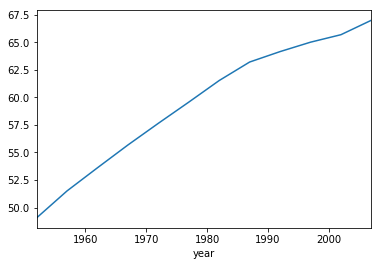

In [115]:
# 년도별 기대수명 시각화
gyle = df.groupby("year")["lifeExp"].mean()
gyle.plot()

In [117]:
scientists = pd.read_csv("data/scientists.csv")
scientists

,Name,Born,Died,Age,Occupation
0,Rosaline Franklin,1920-07-25,1958-04-16,37,Chemist
1,William Gosset,1876-06-13,1937-10-16,61,Statistician
2,Florence Nightingale,1820-05-12,1910-08-13,90,Nurse
3,Marie Curie,1867-11-07,1934-07-04,66,Chemist
4,Rachel Carson,1907-05-27,1964-04-14,56,Biologist
5,John Snow,1813-03-15,1858-06-16,45,Physician
6,Alan Turing,1912-06-23,1954-06-07,41,Computer Scientist
7,Johann Gauss,1777-04-30,1855-02-23,77,Mathematician


In [120]:
ages = scientists["Age"]
ages.max()

90

In [124]:
# 나이가 평균보다 큰 나이만 출력 (boolean 참조 이용)
ages[ages>ages.mean()]

1    61
2    90
3    66
7    77
Name: Age, dtype: int64

In [125]:
ages+ages    # 벡터간 연산은 요소끼리 더해진다

0     74
1    122
2    180
3    132
4    112
5     90
6     82
7    154
Name: Age, dtype: int64

In [126]:
ages + 10    # 10이라는 scalar가 브로드캐스팅되어 ages와 길이가 같은 벡터가 된 후에 요소간 덧셈이 이뤄진다

0     47
1     71
2    100
3     76
4     66
5     55
6     51
7     87
Name: Age, dtype: int64

In [127]:
ages

0    37
1    61
2    90
3    66
4    56
5    45
6    41
7    77
Name: Age, dtype: int64

In [130]:
ages.sort_index()    # 인덱스 기준 정렬

0    37
1    61
2    90
3    66
4    56
5    45
6    41
7    77
Name: Age, dtype: int64

In [129]:
ages.sort_index(ascending=False)    # 인덱스 기준 내림차순 정렬

7    77
6    41
5    45
4    56
3    66
2    90
1    61
0    37
Name: Age, dtype: int64

In [131]:
ages.sort_values()    # default는 오름차순

0    37
6    41
5    45
4    56
1    61
3    66
7    77
2    90
Name: Age, dtype: int64

In [132]:
ages.sort_values(ascending=False) 

2    90
7    77
3    66
1    61
4    56
5    45
6    41
0    37
Name: Age, dtype: int64

In [133]:
scientists.dtypes

Name          object
Born          object
Died          object
Age            int64
Occupation    object
dtype: object

In [136]:
# 특정 열의 데이터형만 알고싶다
scientists["Born"].dtypes    # dtype('O') -> object의 약자

dtype('O')

In [137]:
# 문자로 인식된 날짜들을 날짜형식으로 바꾸기
pd.to_datetime(scientists["Born"])

0   1920-07-25
1   1876-06-13
2   1820-05-12
3   1867-11-07
4   1907-05-27
5   1813-03-15
6   1912-06-23
7   1777-04-30
Name: Born, dtype: datetime64[ns]

In [138]:
pd.to_datetime(scientists["Born"], format="%Y-%m-%d")    # 이 포맷이 default

0   1920-07-25
1   1876-06-13
2   1820-05-12
3   1867-11-07
4   1907-05-27
5   1813-03-15
6   1912-06-23
7   1777-04-30
Name: Born, dtype: datetime64[ns]

In [140]:
# Born하고 Died가 object로 되어있어서 연산을 못하는데, 둘을 날짜형식으로 바꿔서 각 사람들이 며칠 살았는지 컬럼 추가하기
scientists["age_days"] = pd.to_datetime(scientists["Died"]) - pd.to_datetime(scientists["Born"])
scientists

,Name,Born,Died,Age,Occupation,age_days
0,Rosaline Franklin,1920-07-25,1958-04-16,37,Chemist,13779 days
1,William Gosset,1876-06-13,1937-10-16,61,Statistician,22404 days
2,Florence Nightingale,1820-05-12,1910-08-13,90,Nurse,32964 days
3,Marie Curie,1867-11-07,1934-07-04,66,Chemist,24345 days
4,Rachel Carson,1907-05-27,1964-04-14,56,Biologist,20777 days
5,John Snow,1813-03-15,1858-06-16,45,Physician,16529 days
6,Alan Turing,1912-06-23,1954-06-07,41,Computer Scientist,15324 days
7,Johann Gauss,1777-04-30,1855-02-23,77,Mathematician,28422 days


# 데이터 삭제하기

In [142]:
scientists.columns

# Age컬럼 제거
scientists.drop(["Age"], axis=1)

,Name,Born,Died,Occupation,age_days
0,Rosaline Franklin,1920-07-25,1958-04-16,Chemist,13779 days
1,William Gosset,1876-06-13,1937-10-16,Statistician,22404 days
2,Florence Nightingale,1820-05-12,1910-08-13,Nurse,32964 days
3,Marie Curie,1867-11-07,1934-07-04,Chemist,24345 days
4,Rachel Carson,1907-05-27,1964-04-14,Biologist,20777 days
5,John Snow,1813-03-15,1858-06-16,Physician,16529 days
6,Alan Turing,1912-06-23,1954-06-07,Computer Scientist,15324 days
7,Johann Gauss,1777-04-30,1855-02-23,Mathematician,28422 days


In [144]:
import seaborn as sns
anscombe = sns.load_dataset("anscombe")
anscombe

,dataset,x,y
0,I,10.0,8.04
1,I,8.0,6.95
2,I,13.0,7.58
3,I,9.0,8.81
4,I,11.0,8.33
5,I,14.0,9.96
6,I,6.0,7.24
7,I,4.0,4.26
8,I,12.0,10.84
9,I,7.0,4.82


In [147]:
dataset_1 = anscombe[anscombe["dataset"] == "I"]
dataset_1

,dataset,x,y
0,I,10.0,8.04
1,I,8.0,6.95
2,I,13.0,7.58
3,I,9.0,8.81
4,I,11.0,8.33
5,I,14.0,9.96
6,I,6.0,7.24
7,I,4.0,4.26
8,I,12.0,10.84
9,I,7.0,4.82


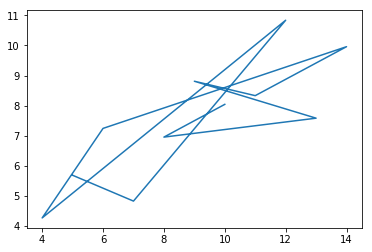

In [151]:
%matplotlib inline    
# 위 명령문은 plt.show 없이도 그림이 보이게끔 할 때 사용하는 명령문
import matplotlib.pyplot as plt
plt.plot(dataset_1["x"], dataset_1["y"])

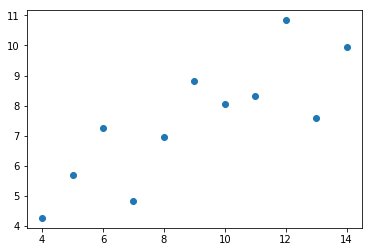

In [152]:
plt.plot(dataset_1["x"], dataset_1["y"], "o")

In [153]:
dataset_1 = anscombe[anscombe["dataset"] == "I"]
dataset_2 = anscombe[anscombe["dataset"] == "II"]
dataset_3 = anscombe[anscombe["dataset"] == "III"]
dataset_4 = anscombe[anscombe["dataset"] == "IV"]

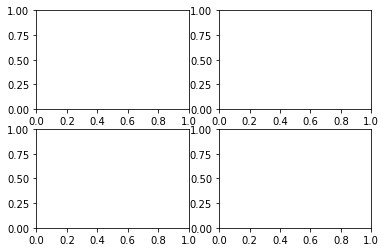

In [154]:
fig = plt.figure()
axes1 = fig.add_subplot(2,2,1)
axes2 = fig.add_subplot(2,2,2)
axes3 = fig.add_subplot(2,2,3)
axes4 = fig.add_subplot(2,2,4)

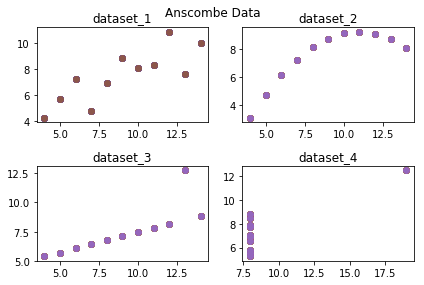

In [164]:
axes1.plot(dataset_1["x"], dataset_1["y"], "o")
axes2.plot(dataset_2["x"], dataset_2["y"], "o")
axes3.plot(dataset_3["x"], dataset_3["y"], "o")
axes4.plot(dataset_4["x"], dataset_4["y"], "o")
fig

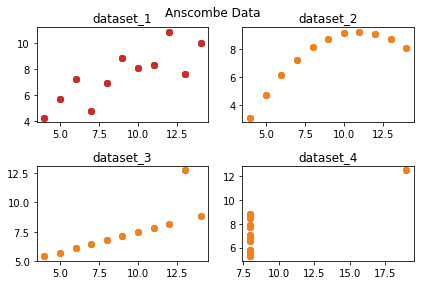

In [160]:
axes1.set_title("dataset_1")
axes2.set_title("dataset_2")
axes3.set_title("dataset_3")
axes4.set_title("dataset_4")
fig.suptitle("Anscombe Data")
fig.tight_layout()    # 그래프끼리 너무 붙어있어서 약간 조정해줌
fig